# 95% - inaccurate explantion in #1

dcd_ch5_hw

# Chapter 5 Homework

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-6

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-6


In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PSP_readDataFile import readDataFile

## Problem 1
**Plot ‘typical’ hydraulic conductivity for sand, silt loam and clay soil as a function of water potential using data from Table 6.1 and eqn (6.14). Use a log–log scale and plot both saturated and unsaturated conductivity. Use the graphs to determine the water potential at which water would flow from silt loam into sand in a layered profile with infiltration.**

In [ ]:
#For sand
#theta s values are found in table 5.3
psi_e = -0.7 # J/kg
b = 1.7
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
psi = np.logspace(0, 3, 100) # logarithmic sequence of psi values
Ksand = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

In [ ]:
#For silt loam
psi_e = -2.1 # J/kg
b = 4.7
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
KsiltLoam = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

In [ ]:
#for clay loam
psi_e = -2.6 # J/kg
b = 5.2
theta_s = 0.45 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
KclayLoam = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

In [ ]:
#For clay
psi_e = -3.7 # J/kg
b = 7.6
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
Kclay = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

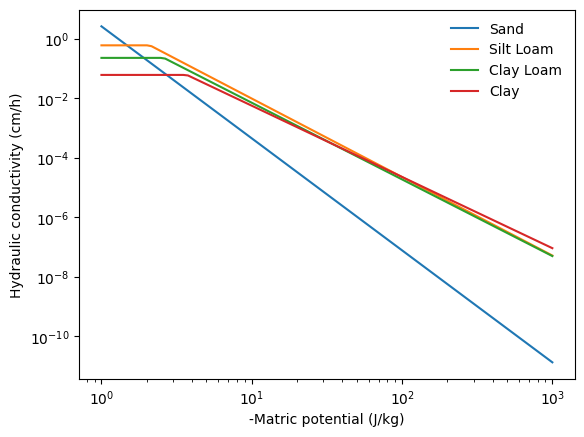

In [ ]:
#Plot results
plt.loglog(psi,Ksand*3600)
plt.loglog(psi,KsiltLoam*3600)
plt.loglog(psi,KclayLoam*3600)
plt.loglog(psi,Kclay*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.legend(['Sand', 'Silt Loam','Clay Loam', 'Clay'], frameon=False)
plt.legend
plt.show()

I believe this would occur at the intersection between the two so the matric potential would have to be less negative than ~ -1 J/kg.

## Problem 2
**Write a Python function to compute saturated hydraulic conductivity from bulk
density, silt fraction and clay fraction. Use your program to show how tillage affects hydraulic conductivity (assuming that tillage decreases the bulk density).**

In [ ]:
#pip install soiltexture

In [ ]:
"""
import soiltexture
from soiltexture import getTexture, getTextures

getTexture(13, 50, classification='USDA')
"""

"\nimport soiltexture\nfrom soiltexture import getTexture, getTextures\n\ngetTexture(13, 50, classification='USDA')\n"

In [ ]:
#completed with help from mark and his code

import soiltexture
from soiltexture import getTexture, getTextures

def ksat_text(Db,silt,clay):
  sand = 100- silt - clay
  sand_frac = sand/100
  silt_frac = silt/100
  clay_frac = clay/100
  Dp = 2650
  porosity = 1 - Db/Dp                                              #m^3/m^3
  theta_s = porosity                                                          #m^3/m^3
  dg = np.exp(sand_frac * (5.76) + silt_frac * (2.3) + clay_frac * (-1.96))      #Equation_2.36
  psi_e = 0.61 * np.log(dg) - 3.9                                                #Equation_5.36
  b = 8.25 - 1.26 * np.log(dg)                                                   #Equation_5.37
  Ks = 0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4                            #Equation_6.34
  print('Ks =', Ks*3600, 'cm/hr  and Db = ', Db, ' kg/m3')

  return(Ks*3600,theta_s,getTexture(sand, clay, classification='USDA'))


In [ ]:
ks =[]
theta_s = []
texture = []
Db_used = []
Db = np.linspace(900,1300,5)
for i in Db:
  output =[]
  output=ksat_text(i,20,30)
  ks.append(output[0])
  theta_s.append(output[1])
  texture.append(output[2])
  Db_used.append(i)

Ks = 1.656895122242264 cm/hr  and Db =  900.0  kg/m3
Ks = 1.3094188889727056 cm/hr  and Db =  1000.0  kg/m3
Ks = 1.019693421200032 cm/hr  and Db =  1100.0  kg/m3
Ks = 0.7809349030934645 cm/hr  and Db =  1200.0  kg/m3
Ks = 0.5867835073116541 cm/hr  and Db =  1300.0  kg/m3


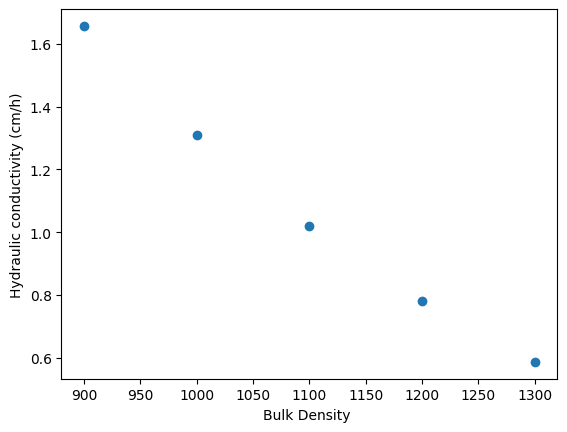

In [ ]:
plt.scatter(Db_used,ks)
plt.xlabel('Bulk Density ')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.show()

As we can see in the above graph, tillage would increase the hydraulic conductivity. This would hold true for the surface layers of soil however the sub soil may have a lower Ksat due to the compaction caused by the tillage.